In [6]:
# Importing Libraries for the Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing raw data

In [32]:
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\Donor Raw Data.csv')
df.head(10)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
5,0,NaN,52,101,63.0,0,U,3,08,U,...,7.0,10.0,3.0,10.0,9,20,19,91,5.82,6
6,0,NaN,53,89,71.0,0,R,3,50,H,...,15.0,20.0,5.0,20.0,7,18,21,91,11.00,8
7,1,5.0,67,89,79.0,0,C,2,28,H,...,4.0,7.0,3.0,5.0,9,24,9,91,5.05,8
8,0,NaN,70,89,41.0,0,C,3,30,H,...,4.0,7.0,3.0,5.0,11,25,17,91,5.03,14
9,1,16.0,71,101,63.0,0,R,2,43,H,...,8.0,11.0,3.0,8.0,11,27,9,91,6.82,13


In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression # LR algorithm - for CLASSIFICATION

from sklearn.model_selection import train_test_split, GridSearchCV # modules for splitting our data
# and gridsearch for optimizing hyperparameters (scenario analysis) in our iterative ML runs

# performance metrics for machine learning
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report

# advanced scaling pipeline
from sklearn.pipeline import FeatureUnion, make_pipeline

In [34]:
RANDOM_STATE = 200

In [35]:
df.shape

(19372, 50)

In [36]:
# Evaluating the raw donor data

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   TARGET_D                     4843 non-null   float64
 2   CONTROL_NUMBER               19372 non-null  int64  
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 4   DONOR_AGE                    14577 non-null  float64
 5   IN_HOUSE                     19372 non-null  int64  
 6   URBANICITY                   19372 non-null  object 
 7   SES                          19372 non-null  object 
 8   CLUSTER_CODE                 19372 non-null  object 
 9   HOME_OWNER                   19372 non-null  object 
 10  DONOR_GENDER                 19372 non-null  object 
 11  INCOME_GROUP                 14980 non-null  float64
 12  PUBLISHED_PHONE              19372 non-null  int64  
 13  OVERLAY_SOURCE  

In [38]:
df.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,14980.000000,19372.000000,19372.000000,10562.000000,...,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,3.907543,0.497729,3.361656,5.005397,...,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,1.864796,0.500008,9.503481,2.815386,...,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,2.000000,0.000000,0.000000,3.000000,...,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,4.000000,0.000000,0.000000,5.000000,...,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,7.000000,1.000000,241.000000,9.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,64.000000,27.000000,260.000000,450.000000,41.000000


In [39]:
df.isnull().sum() #count of null values in columns

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                         0
SES                                0
CLUSTER_CODE                       0
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [40]:
#Below are fields with missing values
#1)Target_D
#2) Donor_Age, 
#3)Income_Group, 
#4)Wealth_Rating,
#5)Months_Since_Last_Prom_Response
# I will employ the median function to fill in the missing values and use deletion to remove negligible missing values

In [41]:
df['DONOR_AGE'].median()

60.0

In [42]:
df['INCOME_GROUP'].median()

4.0

In [45]:
df.DONOR_AGE.replace(np.nan, 60.0, inplace=True)

In [51]:
#MONTHS_SINCE_LAST_PROM_RESP have 246 missing values. This is number is negligible based on the size of the data.
# Hence, i am employing deletion 

df['MONTHS_SINCE_LAST_PROM_RESP'] = df['MONTHS_SINCE_LAST_PROM_RESP'].replace('', np.nan)
df = df.dropna(axis=0, subset=['MONTHS_SINCE_LAST_PROM_RESP'])

<AxesSubplot:xlabel='INCOME_GROUP', ylabel='WEALTH_RATING'>

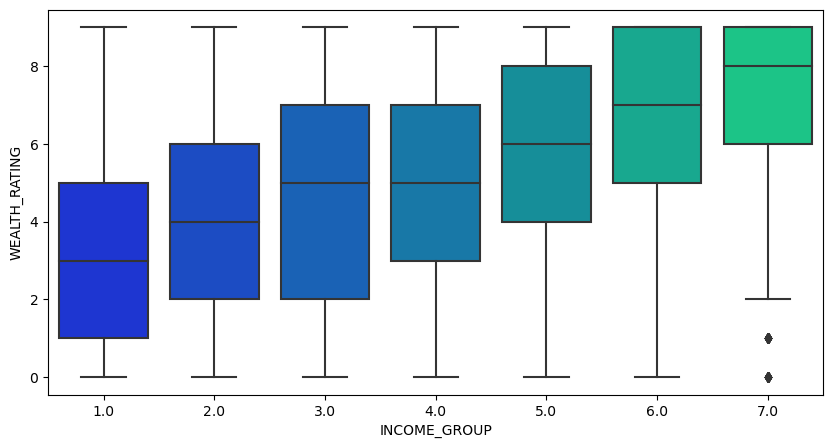

In [46]:
# CHECKING THE RELATIONSHIP BETWEEN WEALTH RATING AND INCOME USING BOX PLOT
plt.figure(figsize=(10, 5))
sns.boxplot(y='WEALTH_RATING',x='INCOME_GROUP',data=df,palette='winter')

In [48]:
#The box plot shows that the wealth group of a person depends on the income_group
#Using this relationship to impute missing wealth_rating based on the corresponding Income group
#Adopting the mean values for each group from the box plot above

In [49]:
def impute_wealthr(cols):
    wealthr = cols[0]
    incomeg = cols[1]
    
    if pd.isnull(wealthr):

        if incomeg == 1:
            return 3

        elif incomeg == 2:
            return 4
        
        elif incomeg == 3:
            return 5
        
        elif incomeg == 4:
            return 5
        
        elif incomeg == 5:
            return 6
        
        elif incomeg == 6:
            return 7
        
        else:
            return 8

    else:
        return wealthr

In [50]:
df['WEALTH_RATING'] = df[['WEALTH_RATING','INCOME_GROUP']].apply(impute_wealthr,axis=1)

In [53]:
df.INCOME_GROUP.replace(np.nan, 4.0, inplace=True)

In [56]:
df.TARGET_D.replace(np.nan, 0.0, inplace=True)

In [57]:
df.isnull().sum()

TARGET_B                       0
TARGET_D                       0
CONTROL_NUMBER                 0
MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
IN_HOUSE                       0
URBANICITY                     0
SES                            0
CLUSTER_CODE                   0
HOME_OWNER                     0
DONOR_GENDER                   0
INCOME_GROUP                   0
PUBLISHED_PHONE                0
OVERLAY_SOURCE                 0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENCY_STATUS_96NK            0
FREQUENCY_STATUS_97NK          0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CAR

In [ ]:
#CLUSTER_CODE column have ' .' as some of the values. 
#These values will be replaced with "0" to avoid errors for the trained model

In [58]:
df['CLUSTER_CODE'].replace(' .',0,inplace = True)

In [59]:
#For easy reference, using .columns to get the names of the columns
df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER

In [60]:
# Now to use pd.get_dummies to transform categorical columns
expanded_df =pd.get_dummies(df, columns=['URBANICITY','SES','HOME_OWNER', 'DONOR_GENDER', 'OVERLAY_SOURCE', 'RECENCY_STATUS_96NK'], drop_first = True)
print(expanded_df.head())

   TARGET_B  TARGET_D  CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  \
0         0       0.0               5                  101       87.0   
1         1      10.0              12                  137       79.0   
2         0       0.0              37                  113       75.0   
3         0       0.0              38                   92       60.0   
4         0       0.0              41                  101       74.0   

   IN_HOUSE CLUSTER_CODE  INCOME_GROUP  PUBLISHED_PHONE  MOR_HIT_RATE  ...  \
0         0            0           2.0                0             0  ...   
1         0           45           7.0                0             0  ...   
2         0           11           5.0                0             0  ...   
3         0           04           6.0                1             0  ...   
4         0           49           2.0                1             8  ...   

   DONOR_GENDER_M  DONOR_GENDER_U  OVERLAY_SOURCE_M  OVERLAY_SOURCE_N  \
0               1  

In [61]:
#Checking new column names
expanded_df.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'CLUSTER_CODE', 'INCOME_GROUP',
       'PUBLISHED_PHONE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'FREQUENCY_STATUS_97NK',
       'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT',
       'FIL

In [ ]:
# spliting the cleaned data into a training set and a testing set

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = expanded_df.drop(['TARGET_B','TARGET_D'],axis=1)
y= expanded_df['TARGET_B']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [65]:
## fit Model (Logistic Regression)

In [66]:
estimator = LogisticRegression(random_state=RANDOM_STATE)

In [67]:
estimator.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=200)

In [68]:
y_pred = estimator.predict(X_test)


y_score = estimator.predict_proba(X_test)[:,0]

In [70]:
accuracy_score(y_test, y_pred)

0.7469501568490763

In [71]:
confusion_matrix(y_test, y_pred)

array([[4282,    3],
       [1449,    4]], dtype=int64)

In [72]:
recall_score(y_test, y_pred)

0.0027529249827942187

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LR: 0.748459 (0.007114)
LDA: 0.749556 (0.007145)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

KNN: 0.700984 (0.007141)
CART: 0.631130 (0.008449)
RF: 0.748093 (0.008503)
NB: 0.691416 (0.012570)
SVM: 0.748825 (0.006903)


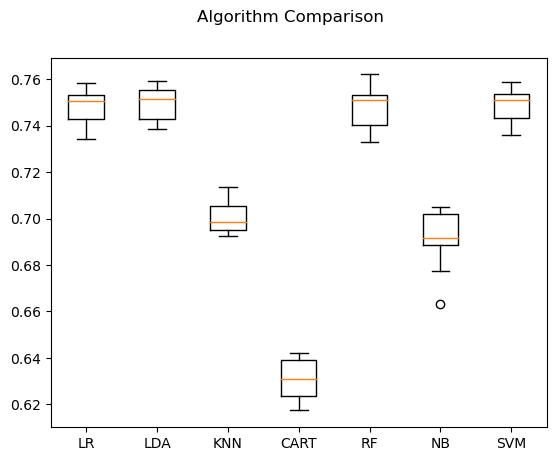

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import model_selection

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy' # or, better still fbeta
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [74]:
# The random forest gave the best accuracy (74.8%)


In [76]:
# Create the random forest instance, and train it with training data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier (n_estimators = 100)

rf2 = RandomForestClassifier (n_estimators = 50, max_leaf_nodes= 5,
            min_samples_leaf=20, min_samples_split=5)

rf.fit(X_train,y_train.values.ravel())

rf2.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_leaf_nodes=5, min_samples_leaf=20,
                       min_samples_split=5, n_estimators=50)

In [77]:
accuracy = rf.score(X_test, y_test)
print('My first model accuracy is = {}%'.format(accuracy*100))

accuracy = rf2.score(X_test, y_test)
print('My second model accuracy is = {}%'.format(accuracy*100))

My first model accuracy is = 74.6253049843151%
My second model accuracy is = 74.6775880097595%


In [78]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.042508)
2. feature 9 (0.038821)
3. feature 12 (0.037707)
4. feature 10 (0.036566)
5. feature 11 (0.034098)
6. feature 16 (0.033908)
7. feature 14 (0.031994)
8. feature 15 (0.031945)
9. feature 20 (0.030144)
10. feature 31 (0.029900)
11. feature 2 (0.029898)
12. feature 40 (0.029807)
13. feature 29 (0.029334)
14. feature 4 (0.029177)
15. feature 28 (0.027762)
16. feature 21 (0.027298)
17. feature 39 (0.027295)
18. feature 27 (0.022734)
19. feature 37 (0.022223)
20. feature 23 (0.022151)
21. feature 38 (0.021891)
22. feature 30 (0.021224)
23. feature 22 (0.021089)
24. feature 32 (0.020429)
25. feature 26 (0.020392)
26. feature 35 (0.018796)
27. feature 41 (0.018508)
28. feature 8 (0.018266)
29. feature 7 (0.018179)
30. feature 33 (0.017664)
31. feature 5 (0.016936)
32. feature 34 (0.014323)
33. feature 24 (0.013902)
34. feature 1 (0.013271)
35. feature 36 (0.012097)
36. feature 25 (0.011403)
37. feature 13 (0.010330)
38. feature 19 (0.009559)
39. feature 

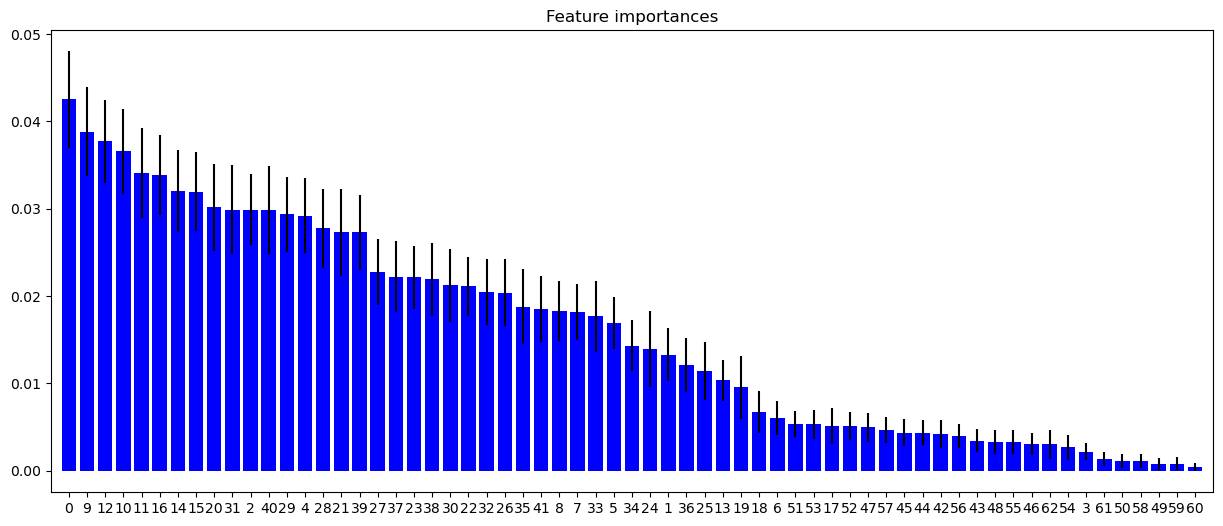

In [79]:
# Plot the feature importances of the forest
plt.figure(figsize=(15,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [83]:
#Using the model developed  to evaluate the prospective donor file
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\Prospective Donor.csv')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CONTROL_NUMBER               2148 non-null   int64  
 1   MONTHS_SINCE_ORIGIN          2148 non-null   int64  
 2   DONOR_AGE                    1619 non-null   float64
 3   IN_HOUSE                     2148 non-null   int64  
 4   URBANICITY                   2148 non-null   object 
 5   SES                          2148 non-null   object 
 6   CLUSTER_CODE                 2148 non-null   object 
 7   HOME_OWNER                   2148 non-null   object 
 8   DONOR_GENDER                 2148 non-null   object 
 9   INCOME_GROUP                 1667 non-null   float64
 10  PUBLISHED_PHONE              2148 non-null   int64  
 11  OVERLAY_SOURCE               2148 non-null   object 
 12  MOR_HIT_RATE                 2148 non-null   int64  
 13  WEALTH_RATING     

In [85]:
# Cleaning the Prospective donor data(checking for Null values, deletion and subtitution with median values)

In [86]:
df.isnull().sum()

CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                       529
IN_HOUSE                          0
URBANICITY                        0
SES                               0
CLUSTER_CODE                      0
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                    481
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  1006
MEDIAN_HOME_VALUE                 0
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PER_CAPITA_INCOME                 0
PCT_ATTRIBUTE1                    0
PCT_ATTRIBUTE2                    0
PCT_ATTRIBUTE3                    0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_STAR_STATUS                0
RECENCY_STATUS_96NK               0
FREQUENCY_STATUS_97NK             0
RECENT_RESPONSE_PROP              0
RECENT_AVG_GIFT_AMT         

In [87]:
#1)Donor_Age, 
#2)Income_Group, 
#3)Wealth_Rating,
#4)Months_Since_Last_Prom_Response

In [88]:
df['DONOR_AGE'].median()

59.0

In [89]:
df.DONOR_AGE.replace(np.nan, 59.0, inplace=True)

In [90]:
df['INCOME_GROUP'].median()

4.0

In [91]:
def impute_icg(cols):
    icg = cols[0]
    
    if pd.isnull(icg):
        return 4
    else:
        return icg

In [92]:
df['INCOME_GROUP'] = df[['INCOME_GROUP']].apply(impute_icg,axis=1)

<AxesSubplot:xlabel='INCOME_GROUP', ylabel='WEALTH_RATING'>

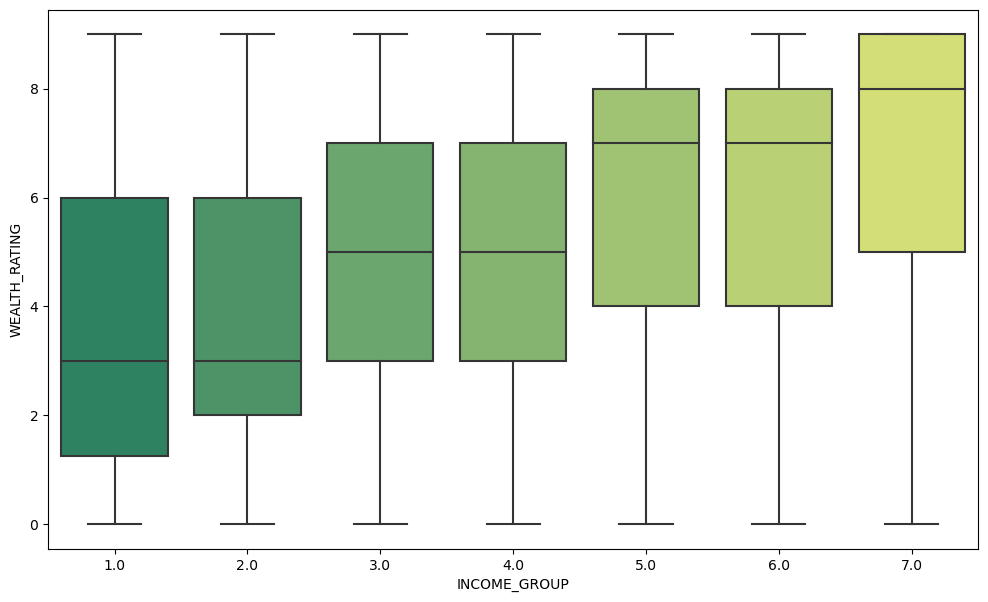

In [95]:
plt.figure(figsize=(12, 7))
sns.boxplot(y='WEALTH_RATING',x='INCOME_GROUP',data=df,palette='summer')

In [96]:
# this shows that the higher the income group, the higher the wealth rating.(there is an established relationship)

In [97]:
def impute_wealthr(cols):
    wealthr = cols[0]
    incomeg = cols[1]
    
    if pd.isnull(wealthr):

        if incomeg == 1:
            return 3

        elif incomeg == 2:
            return 3
        
        elif incomeg == 3:
            return 5
        
        elif incomeg == 4:
            return 5
        
        elif incomeg == 5:
            return 7
        
        elif incomeg == 6:
            return 7
        
        else:
            return 8

    else:
        return wealthr

In [98]:
df['WEALTH_RATING'] = df[['WEALTH_RATING','INCOME_GROUP']].apply(impute_wealthr,axis=1)

In [99]:
df['MONTHS_SINCE_LAST_PROM_RESP'] = df['MONTHS_SINCE_LAST_PROM_RESP'].replace('', np.nan)
df = df.dropna(axis=0, subset=['MONTHS_SINCE_LAST_PROM_RESP'])

In [100]:
df['CLUSTER_CODE'].replace(' .',0,inplace = True)

In [101]:
expanded_df =pd.get_dummies(df, columns=['URBANICITY','SES','HOME_OWNER', 'DONOR_GENDER', 'OVERLAY_SOURCE', 'RECENCY_STATUS_96NK'], drop_first = True)
#print(expanded_data.head())

In [102]:
expanded_df.columns

Index(['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN', 'DONOR_AGE', 'IN_HOUSE',
       'CLUSTER_CODE', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'MOR_HIT_RATE',
       'WEALTH_RATING', 'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME',
       'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME', 'PCT_ATTRIBUTE1',
       'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PEP_STAR',
       'RECENT_STAR_STATUS', 'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP',
       'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
       'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
       'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_AMOUNT',
       'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE',
       'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT',
       'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT',
       'URBANICIT

In [103]:
# Predicting the outcome of the prospective donors

In [104]:
prediction = pd.Series(rf.predict(X))
prospective = df[['CONTROL_NUMBER']]
prospective['prediction']= prediction
print(prospective.loc[prospective['prediction'] ==1])

      CONTROL_NUMBER  prediction
1                142           1
7                665           1
9                743           1
10               788           1
14               968           1
...              ...         ...
2127          190018           1
2128          190099           1
2134          190412           1
2142          190840           1
2147          191710           1

[448 rows x 2 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_2824\1826457904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prospective['prediction']= prediction


In [105]:
# Evaluating the accuraccy of the model

In [107]:
accuracy = rf.score(X, y)
print('Evaluated model accuracy = {}%'.format(accuracy*100))

Evaluated model accuracy = 92.3873261528809%
